In [73]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")
data.Channel.unique()
# Display a description of the dataset
#display(data.describe())

Wholesale customers dataset has 440 samples with 7 features each.


array([2, 1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


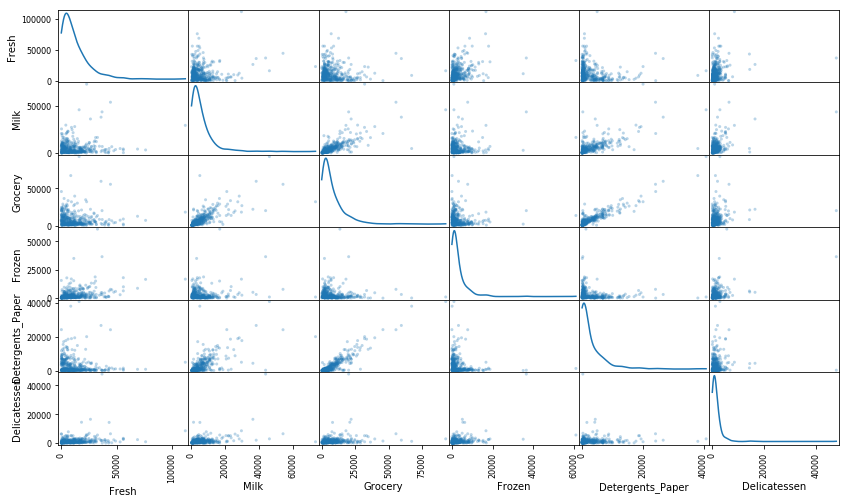

In [16]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig(r"scatter_data.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


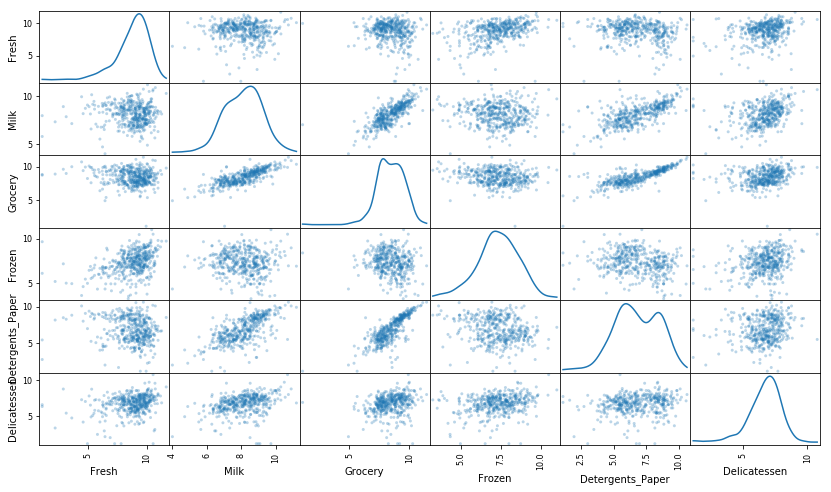

In [17]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig(r"scatter_log_data.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


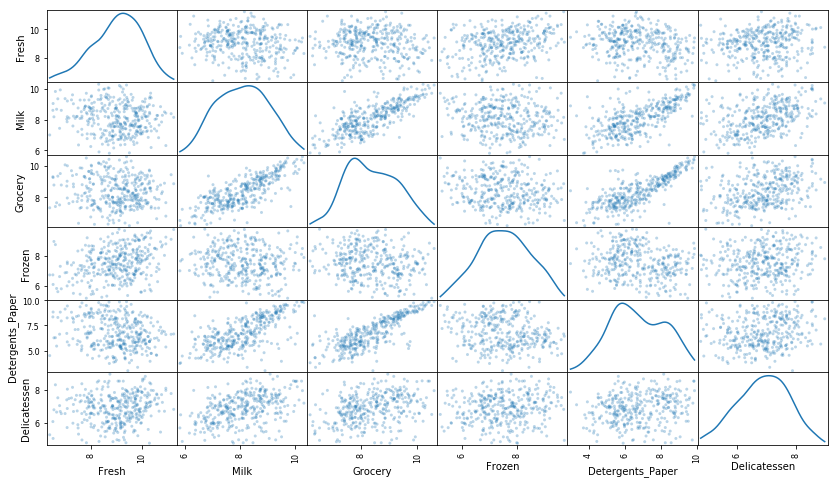

In [65]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = Q3 - Q1
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Get index from outliers
    outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig(r"scatter_good_data.png")

In [67]:
from sklearn.decomposition import PCA

#quero ver o impacto de:
#    - Tirar o Logaritmo
#    - Tirar outliers
#na clusterização dos dados transformados para o espaço de componentes principais

#quero saber a diferença entre setar o número de componentes e usar todas as componentes, mas usar as mais significativas

def doPCA(data,n_components):
    pca = PCA(n_components=n_components)
    pca = pca.fit(data)
    pca_data = pd.DataFrame(pca.transform(data),
                            columns=['Dimension ' + str(x) for x in range(1,n_components+1)])
                            
    return pca_data
    


In [71]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

def apply_clustering(method,n_clusters):
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = method(n_clusters=n_clusters, random_state=12).fit(data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(data, preds, metric='euclidean', random_state=42)
    
    return score, preds, centers

trasnformed_raw = doPCA(data,2)
trasnformed_log = doPCA(log_data,2)
trasnformed_good = doPCA(good_data,2)

#Initializations
N_clusters = np.arange(2,9,1)
score = np.zeros(len(N_clusters))
preds = np.zeros((len(N_clusters),len(reduced_data)))
sample_preds = np.zeros((len(N_clusters),len(samples)))
centers = np.zeros((len(N_clusters),max(N_clusters),2))

#Clustering
for i, n_cluster in enumerate(N_clusters):
    score[i], preds[i,:], centers[i,0:n_cluster,:] = apply_clustering(KMeans,n_cluster,reduced_data)
    print("{} - {} centroids clustering silhouette score: {:.4}".format(None,N_clusters[i],np.round(score[i],4)))

#Get best result - silouette
preds = preds[np.argmax(score),:]
sample_preds = sample_preds[np.argmax(score),:]
centers = centers[np.argmax(score),0:N_clusters[np.argmax(score)],:]
N_clusters = N_clusters[np.argmax(score)]
score = score[np.argmax(score)]

print("\n The best silhouette score is {:.4} and regards the clustering with {} centroids.".format(np.round(score,4),
                                                                                                   N_clusters[np.argmax(score)]))

NameError: name 'reduced_data' is not defined